In [1]:
import pandas as pd

file_path='/Users/anguschen/Library/CloudStorage/OneDrive-國立宜蘭大學/無線網路/UNSW_NB15/'

# 讀取CSV檔案
data_train = pd.read_csv(file_path + 'training.csv')
data_test = pd.read_csv(file_path + 'testing.csv')

# 列出 dataset 的資訊
print("Training Data :", data_train.shape)
for column in data_train.columns:
    unique_values = data_train[column].unique()
    print(f"'{column}' ",end=" ")

print("\n", "Testing Data :", data_test.shape)
for column in data_test.columns:
    unique_values = data_test[column].unique()
    print(f"'{column}' ",end=" ")


Training Data : (82332, 45)
'id'  'dur'  'proto'  'service'  'state'  'spkts'  'dpkts'  'sbytes'  'dbytes'  'rate'  'sttl'  'dttl'  'sload'  'dload'  'sloss'  'dloss'  'sinpkt'  'dinpkt'  'sjit'  'djit'  'swin'  'stcpb'  'dtcpb'  'dwin'  'tcprtt'  'synack'  'ackdat'  'smean'  'dmean'  'trans_depth'  'response_body_len'  'ct_srv_src'  'ct_state_ttl'  'ct_dst_ltm'  'ct_src_dport_ltm'  'ct_dst_sport_ltm'  'ct_dst_src_ltm'  'is_ftp_login'  'ct_ftp_cmd'  'ct_flw_http_mthd'  'ct_src_ltm'  'ct_srv_dst'  'is_sm_ips_ports'  'attack_cat'  'label'  
 Testing Data : (175341, 45)
'id'  'dur'  'proto'  'service'  'state'  'spkts'  'dpkts'  'sbytes'  'dbytes'  'rate'  'sttl'  'dttl'  'sload'  'dload'  'sloss'  'dloss'  'sinpkt'  'dinpkt'  'sjit'  'djit'  'swin'  'stcpb'  'dtcpb'  'dwin'  'tcprtt'  'synack'  'ackdat'  'smean'  'dmean'  'trans_depth'  'response_body_len'  'ct_srv_src'  'ct_state_ttl'  'ct_dst_ltm'  'ct_src_dport_ltm'  'ct_dst_sport_ltm'  'ct_dst_src_ltm'  'is_ftp_login'  'ct_ftp_cmd'  

In [2]:
if 'id' in data_train.columns:
    data_train.drop(columns=['id'], inplace=True)
    print("'train_id' deleted")
    print("Training Data :", data_train.shape)
else:
    print("'train_iid' column does not exist")
if 'id' in data_test.columns:
    data_test.drop(columns=['id'], inplace=True)
    print("\n", "'test_id' deleted")
    print("Testing Data :", data_test.shape)
else:
    print("\n", "'test_id' column does not exist")

'train_id' deleted
Training Data : (82332, 44)

 'test_id' deleted
Testing Data : (175341, 44)


In [3]:
# 合併訓練集和測試集
merged_data = pd.concat([data_train, data_test], ignore_index=True)

# 儲存合併後的資料
#merged_data.to_csv(file_path +'merged_data.csv', index=False)

# 列出 merged_data 資料集的行數和列數
print("Data_info：", merged_data.shape)

print(merged_data.info())

Data_info： (257673, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 n

In [4]:
# 假設 'label' 目標屬性
X = merged_data.drop(columns=['label'])
y = merged_data['label']

# 選擇要進行 One-Hot Encoding 的類別型特徵
categories = ['proto', 'service', 'state', 'attack_cat']

# 使用 get_dummies() 函數對類別型特徵進行 One-Hot Encoding
data_encoded = pd.get_dummies(X, columns=categories)

X.drop(columns=categories, inplace=True)

# 將 One-Hot Encoding 後的資料加回到 merged_data 中
X = pd.concat([X, data_encoded], axis=1)

# 顯示 merged_data 的部分資料以確認結果
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Columns: 245 entries, dur to attack_cat_Worms
dtypes: bool(167), float64(22), int64(56)
memory usage: 194.4 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 257673 entries, 0 to 257672
Series name: label
Non-Null Count   Dtype
--------------   -----
257673 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB
None


In [5]:
from sklearn.preprocessing import StandardScaler

# 標準化資料
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 對特徵進行標準化

# 顯示標準化後的部分資料以確認結果
print(pd.DataFrame(X_scaled, columns=X.columns).head())
print(type(X_scaled))
print(X_scaled.shape)

        dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0 -0.208678 -0.130765 -0.165331 -0.046480 -0.098409 -0.002151  0.722026   
1 -0.208679 -0.130765 -0.165331 -0.039194 -0.098409  0.210460  0.722026   
2 -0.208679 -0.130765 -0.165331 -0.043188 -0.098409  0.678204  0.722026   
3 -0.208679 -0.130765 -0.165331 -0.044155 -0.098409  0.470318  0.722026   
4 -0.208678 -0.130765 -0.165331 -0.037100 -0.098409  0.054546  0.722026   

       dttl     sload    dload  ...  attack_cat_Analysis  attack_cat_Backdoor  \
0 -0.751628  0.590935 -0.27285  ...            -0.102461            -0.095504   
1 -0.751628  4.363255 -0.27285  ...            -0.102461            -0.095504   
2 -0.751628  4.220037 -0.27285  ...            -0.102461            -0.095504   
3 -0.751628  2.850314 -0.27285  ...            -0.102461            -0.095504   
4 -0.751628  4.198501 -0.27285  ...            -0.102461            -0.095504   

   attack_cat_DoS  attack_cat_Exploits  attack_cat_Fuzzers  \


In [6]:
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# 將資料分割為訓練集和測試集（這裡以 80% 資料作為訓練集，20% 作為測試集）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化SGDClassifier模型
svm_model = SGDClassifier(loss='hinge', alpha=0.001, random_state=42, max_iter=1000)

# 定義小批次大小和迭代次數
batch_size = 128
num_iterations = 10

train_scores = []
test_scores = []

# 將標準化後的資料集分為小批次並使用Mini-batch進行迭代訓練
num_samples = len(X_train)

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")
    for i in tqdm(range(0, num_samples, batch_size), desc='Training'):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y))

    train_score = svm_model.score(X_train, y_train)  # 計算訓練集的性能指標
    test_score = svm_model.score(X_test, y_test)     # 計算測試集的性能指標
    train_scores.append(train_score)
    test_scores.append(test_score)

Iteration 1/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 500.12it/s]


Iteration 2/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 498.19it/s]


Iteration 3/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 482.53it/s]


Iteration 4/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 489.89it/s]


Iteration 5/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 498.07it/s]


Iteration 6/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 493.10it/s]


Iteration 7/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 458.88it/s]


Iteration 8/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 495.09it/s]


Iteration 9/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 493.15it/s]


Iteration 10/10


Training: 100%|██████████| 1611/1611 [00:03<00:00, 479.67it/s]


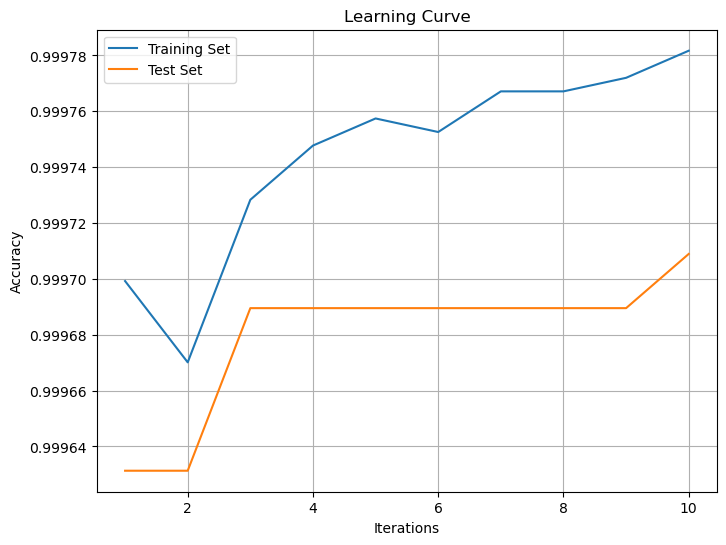

In [7]:
import matplotlib.pyplot as plt

# 繪製學習曲線
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), train_scores, label='Training Set')
plt.plot(range(1, num_iterations + 1), test_scores, label='Test Set')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# 進行 K-fold cross-validation for each evaluation metric
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

num_folds=10

for metric in scoring_metrics:
    cv_scores = cross_val_score(svm_model, X_train, y_train, cv=num_folds, scoring=metric)
    avg_score = np.mean(cv_scores)
    for score in cv_scores:
        print(f"{score:.5f}", end=" ")
    print(f"\nAverage {num_folds}-fold cross-validation {metric}: {avg_score:.5f}", "\n")


1.00000 0.99995 1.00000 1.00000 1.00000 0.99990 0.99990 0.99990 0.99971 0.99971 
Average 10-fold cross-validation accuracy: 0.99991 

1.00000 0.99992 1.00000 1.00000 1.00000 0.99985 0.99992 0.99985 0.99955 0.99955 
Average 10-fold cross-validation precision: 0.99986 

1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 0.99992 1.00000 1.00000 1.00000 
Average 10-fold cross-validation recall: 0.99999 

1.00000 0.99996 1.00000 1.00000 1.00000 0.99992 0.99992 0.99992 0.99977 0.99977 
Average 10-fold cross-validation f1: 0.99993 

1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 0.99992 1.00000 1.00000 1.00000 
Average 10-fold cross-validation roc_auc: 0.99999 



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 預測測試集
pred_test = svm_model.predict(X_test)

print("Testing performance: ", "\n")

test_accuracy = accuracy_score(y_test, pred_test)
test_precision = precision_score(y_test, pred_test)
test_recall = recall_score(y_test, pred_test)
test_f1 = f1_score(y_test, pred_test)
test_roc_auc = roc_auc_score(y_test, pred_test)
test_conf_matrix = confusion_matrix(y_test, pred_test)

print(f"Accuracy: {test_accuracy*100:.4f}%", "\n")
print(f"Precision: {test_precision*100:.4f}%", "\n")
print(f"Recall: {test_recall*100:.4f}%", "\n")
print(f"F1-Score: {test_f1*100:.4f}%", "\n")
print(f"ROC AUC: {test_roc_auc*100:.4f}%", "\n")
print("Confusion Matrix:")
print(test_conf_matrix)

Testing performance:  

Accuracy: 99.9709% 

Precision: 99.9574% 

Recall: 99.9970% 

F1-Score: 99.9772% 

ROC AUC: 99.9610% 

Confusion Matrix:
[[18661    14]
 [    1 32859]]


In [10]:
import joblib
save=input("儲存模型:(y/n)")

if save == 'y':
  joblib.dump(svm_model, file_path + 'svm_model.pkl')
  print("Saved!")
elif save =='n':
  print("Done!")
else:
  print("Error!")

Saved!
